In [2]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

### 1) Load & Save Picture Colors

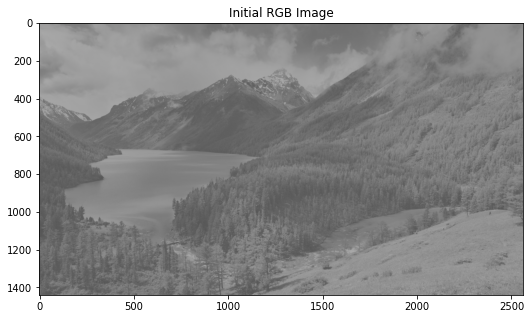

In [3]:
# Load image
img_directory = "image.png"
img = Image.open(img_directory).convert('RGB')  # Convert to RGB (remove alpha dimention)
img_rgb_matrix = np.array(img)                  # Convert to RGB matrix

# Show image
plt.figure(figsize = (10, 5))
plt.imshow(img_rgb_matrix)
plt.title('Initial RGB Image')
plt.show()

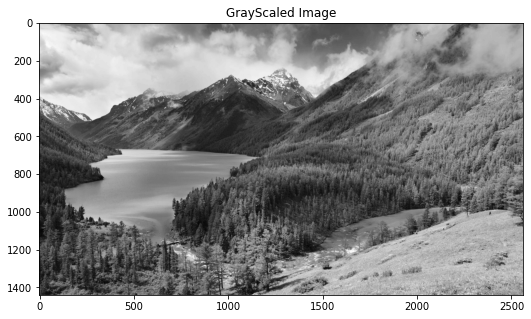

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])

# Convert to grayscale
img_gray_matrix = rgb2gray(img_rgb_matrix)

# Show image
plt.figure(figsize = (10, 5))
plt.imshow(img_gray_matrix, cmap = plt.get_cmap('gray'))
plt.title('GrayScaled Image')
plt.show()

### 2) Make & Plot Histogram

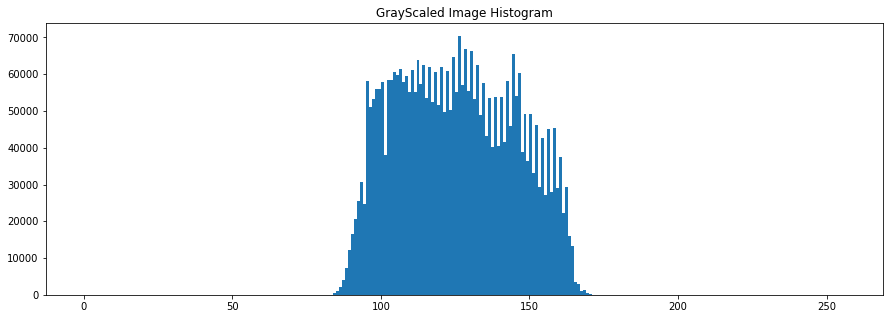

In [5]:
plt.figure(figsize = (15, 5))
plt.hist(img_gray_matrix.ravel(), 256, (0, 256))
plt.title('GrayScaled Image Histogram')
plt.show()

### 3) Calculate cumulative_sum

In [6]:
unique, counts = np.unique(img_gray_matrix.ravel(), return_counts = True)   # Value Counts
count_values = np.asarray((unique, counts)).T                               # Create Value Counts matrix

cumsum = np.cumsum(count_values[:, 1])                                      # Calculate cumsum over counts
cumsum_values = np.asarray((count_values[:, 0], cumsum)).T                  # Create cumsum matrix
print(cumsum_values[:5])

[[   84.9915   371.    ]
 [   85.9914  1327.    ]
 [   86.9913  3403.    ]
 [   87.9912  7557.    ]
 [   88.9911 14852.    ]]


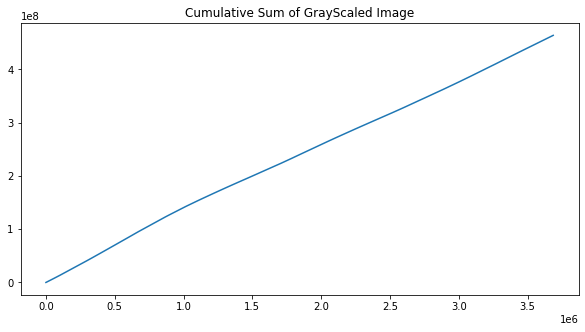

In [21]:
plt.figure(figsize = (10, 5))
plt.plot(np.cumsum(img_gray_matrix.ravel()))
plt.title('Cumulative Sum of GrayScaled Image')
plt.show()

### 4) Create Mapping

In [7]:
color_levels = cumsum_values.shape[0]                                                                           # Unqiue colors count
image_width, image_height = img_gray_matrix.shape                                                               # Image width & height

mapping = np.zeros((color_levels, 2))
mapping[:, 0] = cumsum_values[:, 0]                                                                             # Color values
mapping[:, 1] = np.round((color_levels - 1) * cumsum_values[:, 1] / (image_width * image_height), 0)            # Color levels

mapping[:5]

array([[84.9915,  0.    ],
       [85.9914,  0.    ],
       [86.9913,  0.    ],
       [87.9912,  1.    ],
       [88.9911,  1.    ]])

### 5) Apply Mapping to Image & Save

In [8]:
mapping_dict = dict(zip(mapping[:, 0], mapping[:, 1]))      # Convert to dictionary

mapper = np.vectorize(lambda c: mapping_dict[c])            # Create Mapping function

mapped_img = mapper(img_gray_matrix)                        # Apply Mapping function

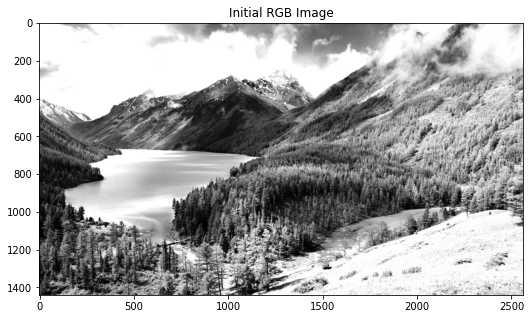

In [9]:
final_img = Image.fromarray(mapped_img).convert("RGB")      # Convert to RGB

# Show image
plt.figure(figsize = (10, 5))
plt.imshow(final_img)
plt.title('Initial RGB Image')
plt.show()

final_img.save("final_img.png")                             # Save to file as PNG

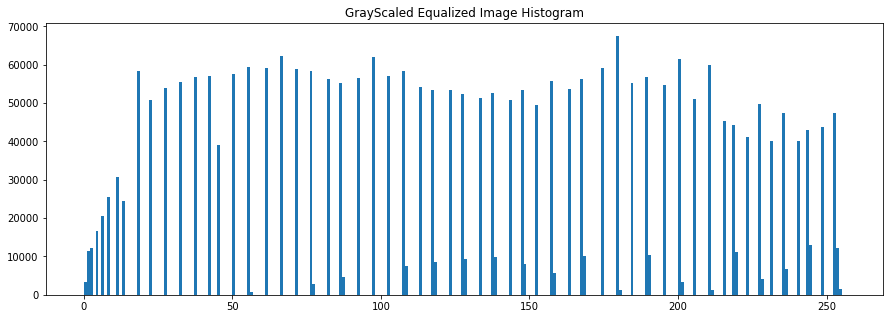

In [12]:
plt.figure(figsize = (15, 5))
plt.hist(mapped_img.ravel(), 256, (0, 256))
plt.title('GrayScaled Equalized Image Histogram')
plt.show()

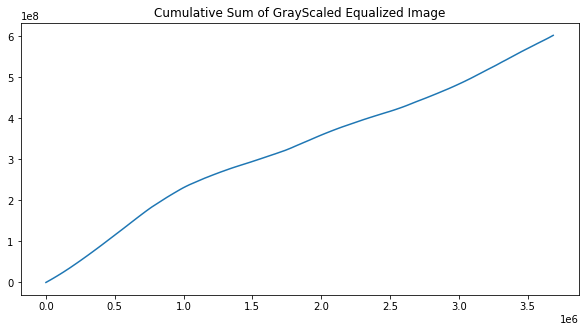

In [19]:
plt.figure(figsize = (10, 5))
plt.plot(np.cumsum(mapped_img.ravel()))
plt.title('Cumulative Sum of GrayScaled Equalized Image')
plt.show()